In [1]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlalchemy as db
import pandas as pd

In [2]:
Base = automap_base()
engine = create_engine("sqlite:///hawaii.sqlite")
Base.prepare(engine, reflect=True)
Station = Base.classes.station
Measurement = Base.classes.measurement
session = Session(engine)

# SQLlite is file based DB

In [3]:
#Equivalent to 'SELECT * FROM census'
Query_Measurement = db.select([Measurement])
df_Measurement = pd.DataFrame(engine.execute(Query_Measurement).fetchall())


In [4]:
df_Measurement_new= df_Measurement.rename(columns={0:"ID",1:"Station",2:"date",3:"prcp",4:"tobs"})

In [5]:
df_Measurement_new.head();

In [6]:
# * Start by finding the most recent date in the data set.
Recent_date =df_Measurement_new["date"].max()
Recent_date

'2017-08-23'

In [7]:
#* Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. 
#**Note** you do not pass in the date as a variable to your query.

df_Measurement_new["date"]=pd.to_datetime(df_Measurement_new["date"])
df_sorted = df_Measurement_new.sort_values(by="date",ascending=True).set_index("date").last("12M")
df_sorted.reset_index(inplace = True)
df_sorted;

In [8]:
#* Select only the `date` and `prcp` values.
df_date_prep = df_sorted[['date','prcp']]

In [9]:
#* Load the query results into a Pandas DataFrame and set the index to the date column.
df_date_prep.set_index('date',inplace = False);

In [17]:
#* Sort the DataFrame values by `date`.
df_date_prep.sort_index(axis = 0,ascending=True,inplace=False);
df_date_prep

,date,prcp
0,2016-09-01,0.00
1,2016-09-01,0.00
2,2016-09-01,0.00
3,2016-09-01,NaN
4,2016-09-01,0.02
...,...,...
2166,2017-08-22,0.50
2167,2017-08-23,0.00
2168,2017-08-23,0.00
2169,2017-08-23,0.08


In [19]:
df_date_prep.dtypes

date    datetime64[ns]
prcp           float64
dtype: object

<AxesSubplot:xlabel='date'>

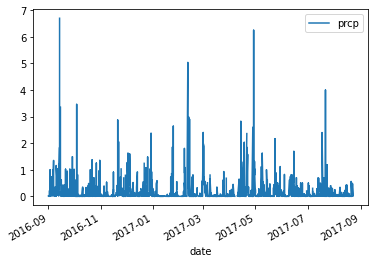

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
df_date_prep.plot('date','prcp')


In [36]:
# * Use Pandas to print the summary statistics for the precipitation data.
df_date_prep.describe()


,prcp
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [43]:
Query_Station = db.select([Station])
df_Station = pd.DataFrame(engine.execute(Query_Station).fetchall())


In [44]:
df_Station

,0,1,2,3,4,5
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [45]:
df_Station_new= df_Station.rename(columns={0:"ID",1:"Station",2:"name",3:"latitue",4:"longitude",5:"elevation"})

In [46]:
df_Station_new

,ID,Station,name,latitue,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [47]:
#* Design a query to calculate the total number of stations in the dataset.

df_Station_new.Station.count()

9

In [72]:
#* Design a query to find the most active stations (i.e. which stations have the most rows?).
df_Measurement_new.Station.mode().tolist()

['USC00519281']

In [67]:
df_Measurement_new['Station'].value_counts()[df_Measurement_new['Station'].value_counts() == df_Measurement_new['Station'].value_counts().max()]

USC00519281    2772
Name: Station, dtype: int64

In [70]:
#  * List the stations and observation counts in descending order.

df_Measurement_new[["Station","tobs"]].value_counts()

Station      tobs
USC00519523  76.0    349
USC00513117  74.0    348
USC00519397  78.0    342
             77.0    335
USC00516128  71.0    329
                    ... 
USC00514830  85.0      1
             62.0      1
             59.0      1
             58.0      1
USC00511918  53.0      1
Length: 258, dtype: int64

In [ ]:
# * Which station id has the highest number of observations?


In [92]:
# * Using the most active station id, calculate the lowest, highest, and average temperature.
Most_ActiveStation= df_Measurement_new.Station.mode().tolist()
Max_value =(df_Measurement_new.loc[df_Measurement_new['Station'] == Most_ActiveStation[0]]).tobs.max()
Min_value=(df_Measurement_new.loc[df_Measurement_new['Station'] == Most_ActiveStation[0]]).tobs.min()
Avg_value= (df_Measurement_new.loc[df_Measurement_new['Station'] == Most_ActiveStation[0]]).tobs.mean()

In [112]:
# * Design a query to retrieve the last 12 months of temperature observation data (TOBS).
df_Last_12M = df_Measurement_new.sort_values(by="date",ascending=True).set_index("date").last("12M")
df_Last_12M.reset_index(inplace = True)
df_Last_12M[["date","tobs"]];

In [113]:
# * Filter by the station with the highest number of observations.
Highest_observation= df_Measurement_new.Station.mode().tolist()


In [115]:
# * Query the last 12 months of temperature observation data for this station.
df_Msmt_HighObs=df_Measurement_new.loc[df_Measurement_new["Station"]==Highest_observation[0]]
df_MSmt_HighObs_Last12M = df_Msmt_HighObs.sort_values(by="date",ascending=True).set_index("date").last("12M")
df_MSmt_HighObs_Last12M.reset_index(inplace = True)
df_MSmt_HighObs_Last12M

,date,ID,Station,prcp,tobs
0,2016-09-01,14617,USC00519281,0.02,80.0
1,2016-09-02,14618,USC00519281,0.01,80.0
2,2016-09-03,14619,USC00519281,0.12,78.0
3,2016-09-04,14620,USC00519281,0.14,78.0
4,2016-09-05,14621,USC00519281,0.03,78.0
...,...,...,...,...,...
338,2017-08-14,14955,USC00519281,0.00,77.0
339,2017-08-15,14956,USC00519281,0.32,77.0
340,2017-08-16,14957,USC00519281,0.12,76.0
341,2017-08-17,14958,USC00519281,0.01,76.0


C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tobs'>

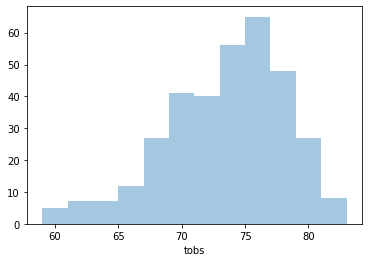

In [119]:
sns.distplot(df_MSmt_HighObs_Last12M["tobs"],bins=12,kde=False)